Goodreads project goals:
- Webscrape to extract the information
- Pandas to clean and format
- Exploratory Data Analysis
    - What are the descriptive statistics around my reading behavior?
    - How do my ratings compare to overall ratings?
- Predictive Analytics:
    - Which recommended books have the highest likelihood to be read?
    - Which books are most likely to be finished?
    - What is the correlation betweeh these two scores?    

In [1]:
# import required packages
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# define the URL variable and save the request as page
URL = 'https://www.goodreads.com/choiceawards/best-fiction-books-2022'
page = requests.get(URL)

In [4]:
# make the soup by parsing the html text 
soup = BeautifulSoup(page.text, 'html')

In [ ]:
# print the soup in it's prettified form
print(soup.prettify())

In [105]:
soup.find_all('div')

[<div data-react-class="ReactComponents.StoresInitializer" data-react-props="{}"><noscript data-react-checksum="-1173876371" data-reactid=".2fqhwf14naq"></noscript></div>,
 <div class="content" id="bodycontainer" style="">
 <script>
   //<![CDATA[
     var initializeGrfb = function() {
       $grfb.initialize({
         appId: "2415071772"
       });
     };
     if (typeof $grfb !== "undefined") {
       initializeGrfb();
     } else {
       window.addEventListener("DOMContentLoaded", function() {
         if (typeof $grfb !== "undefined") {
           initializeGrfb();
         }
       });
     }
   //]]>
 </script>
 <script>
   //<![CDATA[
     function loadScript(url, callback) {
       var script = document.createElement("script");
       script.type = "text/javascript";
     
       if (script.readyState) {  //Internet Explorer
           script.onreadystatechange = function() {
             if (script.readyState == "loaded" ||
                     script.readyState == "complet

In [7]:
soup.find_all('div', class_ = 'content' )

[<div class="content" id="bodycontainer" style="">
 <script>
   //<![CDATA[
     var initializeGrfb = function() {
       $grfb.initialize({
         appId: "2415071772"
       });
     };
     if (typeof $grfb !== "undefined") {
       initializeGrfb();
     } else {
       window.addEventListener("DOMContentLoaded", function() {
         if (typeof $grfb !== "undefined") {
           initializeGrfb();
         }
       });
     }
   //]]>
 </script>
 <script>
   //<![CDATA[
     function loadScript(url, callback) {
       var script = document.createElement("script");
       script.type = "text/javascript";
     
       if (script.readyState) {  //Internet Explorer
           script.onreadystatechange = function() {
             if (script.readyState == "loaded" ||
                     script.readyState == "complete") {
               script.onreadystatechange = null;
               callback();
             }
           };
       } else {  //Other browsers
         script.onload = fu

In [8]:
maincontentfloat = soup.find('div', class_ = 'mainContentFloat' )

In [9]:
maincontentfloat.find_all('div')

[<div id="flashContainer">
 </div>,
 <div class="gcaResults" id="choiceBody">
 <div class="gcaLeftContainer">
 <div class="u-marginLeftLarge">
 <a href="/choiceawards/best-books-2022"><img alt="2022 Goodreads Choice Awards" height="" id="choiceLogo" src="https://s.gr-assets.com/assets/award/2022/choice-logo-large-97eb132202f5a32ba8c884053a95e7e2.png" title="2022 Goodreads Choice Awards" width=""/></a>
 </div>
 <ul class="categoriesList">
 <li class="categoriesList__category categoriesList__category--selected">
 <a class="categoriesList__categoryLink categoriesList__categoryLink--selected" href="/choiceawards/best-fiction-books-2022">Fiction
 <span class="voteNotice" id="vote_notice_poll_256683" style="display: none">
 ✓
 </span>
 <div class="voteNotice">
 view results →
 </div>
 </a></li>
 <li class="categoriesList__category">
 <a class="categoriesList__categoryLink" href="/choiceawards/best-mystery-thriller-books-2022">Mystery &amp; Thriller
 <span class="voteNotice" id="vote_notice_p

In [10]:
 categories_ul = maincontentfloat.find("ul", class_="categoriesList")

In [11]:
li = categories_ul.find_all('li')

In [13]:
# Assuming you already have the BeautifulSoup object 'maincontentfloat'
category_list = []

# Find the 'ul' element with class 'categoriesList'
categories_ul = maincontentfloat.find("ul", class_="categoriesList")

# Iterate through 'li' elements within the 'ul'
for li in categories_ul.find_all("li"):
    # Find the 'a' element within the 'li'
    a = li.find("a")
    if a:
        # Extract the category name and its href attribute
        category_name = a.text.strip()
        category_href = a["href"]
        
        # Append the category name and hyperlink to the list
        category_list.append({"Category": category_name, "Hyperlink": category_href})

# Print the extracted category data
for category_data in category_list:
    print("Category:", category_data["Category"])
    print("Hyperlink:", category_data["Hyperlink"])
    print()


Category: Fiction

✓


view results →
Hyperlink: /choiceawards/best-fiction-books-2022

Category: Mystery & Thriller

✓


view results →
Hyperlink: /choiceawards/best-mystery-thriller-books-2022

Category: Historical Fiction

✓


view results →
Hyperlink: /choiceawards/best-historical-fiction-books-2022

Category: Fantasy

✓


view results →
Hyperlink: /choiceawards/best-fantasy-books-2022

Category: Romance

✓


view results →
Hyperlink: /choiceawards/best-romance-books-2022

Category: Science Fiction

✓


view results →
Hyperlink: /choiceawards/best-science-fiction-books-2022

Category: Horror

✓


view results →
Hyperlink: /choiceawards/best-horror-books-2022

Category: Humor

✓


view results →
Hyperlink: /choiceawards/best-humor-books-2022

Category: Nonfiction

✓


view results →
Hyperlink: /choiceawards/best-nonfiction-books-2022

Category: Memoir & Autobiography

✓


view results →
Hyperlink: /choiceawards/best-memoir-autobiography-books-2022

Category: History & Biography

✓



In [14]:
# Convert category_list to a dataframe
df = pd.DataFrame(category_list)
print(df)

                                             Category  \
0                    Fiction\n\n✓\n\n\nview results →   
1         Mystery & Thriller\n\n✓\n\n\nview results →   
2         Historical Fiction\n\n✓\n\n\nview results →   
3                    Fantasy\n\n✓\n\n\nview results →   
4                    Romance\n\n✓\n\n\nview results →   
5            Science Fiction\n\n✓\n\n\nview results →   
6                     Horror\n\n✓\n\n\nview results →   
7                      Humor\n\n✓\n\n\nview results →   
8                 Nonfiction\n\n✓\n\n\nview results →   
9     Memoir & Autobiography\n\n✓\n\n\nview results →   
10       History & Biography\n\n✓\n\n\nview results →   
11   Graphic Novels & Comics\n\n✓\n\n\nview results →   
12                    Poetry\n\n✓\n\n\nview results →   
13               Debut Novel\n\n✓\n\n\nview results →   
14       Young Adult Fiction\n\n✓\n\n\nview results →   
15  Young Adult Fantasy & Science Fiction\n\n✓\n\n...   
16  Middle Grade & Children's\n

In [15]:
# Add a column with the full URL
df['category_url'] = 'https://www.goodreads.com'+ df['Hyperlink']

# Clean up the category by removing extraneous text
df['category'] = df['Category'].str.split('\n').str[0]

# In order to view the full values and test the URLs, we need to set the display options
pd.set_option('display.max_colwidth', None)
print(df)

                                                          Category  \
0                                 Fiction\n\n✓\n\n\nview results →   
1                      Mystery & Thriller\n\n✓\n\n\nview results →   
2                      Historical Fiction\n\n✓\n\n\nview results →   
3                                 Fantasy\n\n✓\n\n\nview results →   
4                                 Romance\n\n✓\n\n\nview results →   
5                         Science Fiction\n\n✓\n\n\nview results →   
6                                  Horror\n\n✓\n\n\nview results →   
7                                   Humor\n\n✓\n\n\nview results →   
8                              Nonfiction\n\n✓\n\n\nview results →   
9                  Memoir & Autobiography\n\n✓\n\n\nview results →   
10                    History & Biography\n\n✓\n\n\nview results →   
11                Graphic Novels & Comics\n\n✓\n\n\nview results →   
12                                 Poetry\n\n✓\n\n\nview results →   
13                  

In [44]:
print(df.head())

                                      Category  \
0             Fiction\n\n✓\n\n\nview results →   
1  Mystery & Thriller\n\n✓\n\n\nview results →   
2  Historical Fiction\n\n✓\n\n\nview results →   
3             Fantasy\n\n✓\n\n\nview results →   
4             Romance\n\n✓\n\n\nview results →   

                                          Hyperlink  \
0             /choiceawards/best-fiction-books-2022   
1    /choiceawards/best-mystery-thriller-books-2022   
2  /choiceawards/best-historical-fiction-books-2022   
3             /choiceawards/best-fantasy-books-2022   
4             /choiceawards/best-romance-books-2022   

                                                                category_url  \
0             https://www.goodreads.com/choiceawards/best-fiction-books-2022   
1    https://www.goodreads.com/choiceawards/best-mystery-thriller-books-2022   
2  https://www.goodreads.com/choiceawards/best-historical-fiction-books-2022   
3             https://www.goodreads.com/choiceaw

In [47]:
# Now we need to create a loop that will pull the book details from each of the category URLs
book_data_list = []  # To store book data for all categories

# Loop through each category in the DataFrame
for index, row in df.iterrows():
    category = row['category']  # Get the category name
    category_url = row['category_url']  # Get the category URL

    response = requests.get(category_url)
    category_soup = BeautifulSoup(response.text, 'html.parser')
    # Find all elements with the specified class for the current category
    maincontentfloat = category_soup.find('div', class_ = 'mainContentFloat' )
    book_elements = maincontentfloat.find_all("div", class_='js-tooltipTrigger tooltipTrigger')
    votes_elements = maincontentfloat.find_all("strong", class_='uitext result')

   # Use zip to iterate through both lists together
    for book_element, votes_element in zip(book_elements, votes_elements):
        # Extract the data-resource-id attribute
        book_id = book_element.get('data-resource-id')

        # Find the 'a' element within the 'div'
        a = book_element.find("a")

        if a:
            # Extract the href attribute from the 'a' element
            book_link = a.get('href')

            # Extract the votes text and clean it up
            votes_text = votes_element.get_text(strip=True)
            votes_numeric = ''.join(filter(str.isdigit, votes_text))

            # Convert the cleaned text to a numeric value
            votes = int(votes_numeric) if votes_text else None

            # Append the data to the current category list
            book_data_list.append({"category": category, "book_id": book_id
                                , "book_link": 'https://www.goodreads.com' + book_link
                                , "votes": votes})
                              
# Print the extracted book data for all categories
df_books = pd.DataFrame(book_data_list)


In [48]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   340 non-null    object
 1   book_id    340 non-null    object
 2   book_link  340 non-null    object
 3   votes      340 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.8+ KB


Explore the individual book HTML before writing the book details loop

In [49]:
book_URL = 'https://www.goodreads.com/book/show/58784475-tomorrow-and-tomorrow-and-tomorrow?from_choice=true'
book_page = requests.get(book_URL)
# make the soup by parsing the html text 
book_soup = BeautifulSoup(book_page.text, 'html')
# print the soup in it's prettified form
print(book_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   var ue_t0=window.ue_t0||+new Date();(function(e){var c=e,a={main_scope:"mainscopecsm",q:[],t0:c.ue_t0||+new Date(),d:g};function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(k,j,h){var i={m:k,f:j,l:h,fromOnError:1,args:arguments};c.ueLogError(i);return false}b.skipTrace=1;e.onerror=b;function f(){c.uex("ld")}if(e.addEventListener){e.addEventListener("load",f,false)}else{if(e.attachEvent){e.attachEvent("onload",f)}}a.tag=d("tag");a.log=d("log");a.reset=d("rst");c.ue_csm=c;c.ue=a;c.ueLogError=d("err");c.ues=d("ues");c.uet=d("uet");c.uex=d("uex");c.uet("ue")})(window);(function(e,d){var a=e.ue||{};function c(g){if(!g){return}var f=d.head||d.getElementsByTagName("head")[0]||d.documentElement,h=d.createElement("script");h.async="async";h.src=g;f.insertBefore(h,f.firstChild)}function b(){var k=e.ue_cdn||"z-ecx.images-amazon.com",g=e.ue_cdns||"images-na.ssl-images-amazo

In [51]:
book_main_content = book_soup.find('div', class_ = "BookPage__mainContent")


In [52]:
book_main_content.find_all('h1')

[<h1 aria-label="Book title: Tomorrow, and Tomorrow, and Tomorrow" class="Text Text__title1" data-testid="bookTitle">Tomorrow, and Tomorrow, and Tomorrow</h1>]

In [53]:
title_element = book_main_content.find("h1", class_="Text__title1")

if title_element:
    title = title_element.get_text(strip=True)
    print(title)

author_element = book_main_content.find("div", class_="BookPageMetadataSection__contributor")
if author_element:
    author = author_element.get_text(strip=True)
    print(author)




Tomorrow, and Tomorrow, and Tomorrow
Gabrielle Zevin


In [54]:
book_metadata = book_main_content.find("div", class_="BookPageMetadataSection__ratingStats")
print(book_metadata)

<div class="BookPageMetadataSection__ratingStats"><a class="RatingStatistics RatingStatistics__interactive" href="#CommunityReviews"><div aria-label="Average rating of 4.20 stars." class="RatingStatistics__column" role="figure"><span aria-hidden="true"><span aria-label="Rating 4.2 out of 5" class="RatingStars RatingStars__medium" role="img"><span class="baseClass RatingStar--medium"><svg role="presentation" viewbox="0 0 24 24"><path class="RatingStar__fill" d="M24 9.63469C24 9.35683 23.7747 9.13158 23.4969 9.13158H15.0892L12.477 1.34327C12.4269 1.19375 12.3095 1.0764 12.16 1.02625C11.8966 0.937894 11.6114 1.07983 11.523 1.34327L8.91088 9.13158H0.503157C0.33975 9.13158 0.186521 9.21094 0.0922364 9.3444C-0.0680877 9.57134 -0.0140806 9.88529 0.212865 10.0456L7.00408 14.8432L4.40172 22.6166C4.35092 22.7683 4.37534 22.9352 4.46749 23.066C4.6275 23.2932 4.94137 23.3476 5.16853 23.1876L12 18.3758L18.8317 23.183C18.9625 23.2751 19.1293 23.2994 19.281 23.2486C19.5445 23.1604 19.6865 22.8752 19.

In [55]:
average_rating = book_metadata.find("a", class_="RatingStatistics RatingStatistics__interactive")
if average_rating:
    avg_rating = average_rating.find("div", class_="RatingStatistics__rating").get_text(strip=True)
    ratings_reviews = average_rating.find("div", class_="RatingStatistics__meta").get_text(strip=True)
# Split ratings and reviews
    ratings, reviews = ratings_reviews.split("ratings")
    reviews = reviews.replace("reviews", "").strip()

    print("Average Rating:", avg_rating)
    print("Ratings:", ratings)
    print("Reviews:", reviews)

    

Average Rating: 4.20
Ratings: 713,218
Reviews: 88,770


In [57]:
book_details = book_main_content.find('div', class_='BookDetails')

for book_detail in book_details:
    FeaturedDetails = book_detail.find('div', class_='FeaturedDetails')
    if FeaturedDetails:
        pages_element = FeaturedDetails.find('span', {'itemprop': 'numberOfPages'})
        if pages_element:
            pages = pages_element.get_text(strip=True)
            print("Pages:", pages)

print()


In [58]:
book_details = book_main_content.find('div', class_='FeaturedDetails')

In [59]:
print(book_details.prettify())

<div class="FeaturedDetails">
 <p data-testid="pagesFormat">
  401 pages, Hardcover
 </p>
 <p data-testid="publicationInfo">
  First published July 5, 2022
 </p>
</div>



In [60]:
pages_element = FeaturedDetails.find('p', attrs={'data-testid': 'pagesFormat'})
publication_element = FeaturedDetails.find('p', attrs={'data-testid': 'publicationInfo'})

if pages_element:
    pages_text = pages_element.get_text(strip=True)
    pages = pages_text.split(',')[0].strip()  # Extract the number of pages

if publication_element:
    publication_text = publication_element.get_text(strip=True)
    publication_date = publication_text.split('First published')[-1].strip()  # Extract the publication date

print("Pages:", pages)
print("Publication Date:", publication_date)

Pages: 401 pages
Publication Date: July 5, 2022


In [61]:
price_element = book_main_content.find("span", class_="Button__labelItem")

if price_element:
    price = price_element.get_text(strip=True)
    print("Price:", price)

Price: 


In [62]:
book_main_content.find_all("span", class_="Button__labelItem")


[<span class="Button__labelItem"><i class="Icon ShareIcon"><svg viewbox="0 0 24 24"><path d="M16.5 2C18.433 2 20 3.567 20 5.5C20 7.433 18.433 9 16.5 9C15.6752 9 14.917 8.71467 14.3187 8.23733L10.6119 10.3965C10.8599 10.8769 11 11.4221 11 12C11 12.619 10.8393 13.2006 10.5573 13.7051L14.2507 15.8184C14.859 15.3076 15.6436 15 16.5 15C18.433 15 20 16.567 20 18.5C20 20.433 18.433 22 16.5 22C14.567 22 13 20.433 13 18.5C13 17.9703 13.1177 17.4681 13.3283 17.0181L9.62754 14.901C9.59678 14.8834 9.56774 14.8639 9.54048 14.8429C8.9661 15.2568 8.26144 15.5 7.5 15.5C5.567 15.5 4 13.933 4 12C4 10.067 5.567 8.5 7.5 8.5C8.30519 8.5 9.04687 8.77189 9.63824 9.22888L13.364 7.056C13.131 6.58729 13 6.05895 13 5.5C13 3.567 14.567 2 16.5 2ZM16.5 16.5C15.3954 16.5 14.5 17.3954 14.5 18.5C14.5 19.6046 15.3954 20.5 16.5 20.5C17.6046 20.5 18.5 19.6046 18.5 18.5C18.5 17.3954 17.6046 16.5 16.5 16.5ZM7.5 10C6.39543 10 5.5 10.8954 5.5 12C5.5 13.1046 6.39543 14 7.5 14C8.60457 14 9.5 13.1046 9.5 12C9.5 10.8954 8.60457 

In [63]:
kindle_price_element = book_main_content.find_all("span", class_="Button__labelItem")

for kindle_price_element in kindle_price_element:
    if "Kindle" in kindle_price_element.get_text():
        kindle_price_element = kindle_price_element
        break

if kindle_price_element:
    kindle_price = kindle_price_element.get_text(strip=True)
    print("Kindle Price:", kindle_price)

Kindle Price: Kindle $13.99


In [64]:
author_info = book_main_content.find("div", class_="FeaturedPerson__infoPrimary")

author_info.get_text()

'Gabrielle Zevin17\xa0books13.5k\xa0followers'

In [66]:
author_info2 = author_info.find("span", class_="Text Text__body3 Text__subdued")

string = author_info2.get_text()

books, followers = string.split("books")
followers = followers.replace("followers", "").strip()

print(books)  
print(followers)


17 
13.5k


In [67]:
df_books.info()
df_books.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   340 non-null    object
 1   book_id    340 non-null    object
 2   book_link  340 non-null    object
 3   votes      340 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.8+ KB


,category,book_id,book_link,votes
0,Fiction,58784475,https://www.goodreads.com/book/show/58784475-tomorrow-and-tomorrow-and-tomorrow?from_choice=true,90971
1,Fiction,57701764,https://www.goodreads.com/book/show/57701764-wish-you-were-here?from_choice=true,54368
2,Fiction,60209470,https://www.goodreads.com/book/show/60209470-the-winners?from_choice=true,52412
3,Fiction,58733693,https://www.goodreads.com/book/show/58733693-remarkably-bright-creatures?from_choice=true,45635
4,Fiction,59227941,https://www.goodreads.com/book/show/59227941-the-hotel-nantucket?from_choice=true,39882


In [68]:
df_books_limit = df_books.head(5)
print(df_books_limit)

  category   book_id  \
0  Fiction  58784475   
1  Fiction  57701764   
2  Fiction  60209470   
3  Fiction  58733693   
4  Fiction  59227941   

                                                                                          book_link  \
0  https://www.goodreads.com/book/show/58784475-tomorrow-and-tomorrow-and-tomorrow?from_choice=true   
1                  https://www.goodreads.com/book/show/57701764-wish-you-were-here?from_choice=true   
2                         https://www.goodreads.com/book/show/60209470-the-winners?from_choice=true   
3         https://www.goodreads.com/book/show/58733693-remarkably-bright-creatures?from_choice=true   
4                 https://www.goodreads.com/book/show/59227941-the-hotel-nantucket?from_choice=true   

   votes  
0  90971  
1  54368  
2  52412  
3  45635  
4  39882  


In [70]:
chunk_size = 5  # Number of books to process at a time
book_data_chunks = [df_books[i:i + chunk_size] for i in range(0, len(df_books), chunk_size)]

book_details_list = []  # To store book data for all categories

for chunks in book_data_chunks:
    
    # Loop through each category in the DataFrame
    for index, row in chunks.iterrows():
        category = row['category']  # Get the category name
        book_id = row['book_id']  # Get the book id
        book_url = row['book_link']  # Get the book URL
        votes = row['votes']  # Get the votes

        # Make a request to the book URL and parse the HTML

        try: 
            response = requests.get(book_url)
            response.raise_for_status()  
            book_soup = BeautifulSoup(response.text, 'html.parser')

        except requests.exceptions.RequestException as e:
            # Handle invalid URLs or other request exceptions
            print(f"Error fetching URL: {book_url}. Error: {e}")
            continue
        
        # Find book details elements in the parsed HTML
        title_element = book_soup.find("h1", class_="Text Text__title1")
        author_element = book_soup.find("div", class_="BookPageMetadataSection__contributor")
        book_metadata = book_soup.find("div", class_="BookPageMetadataSection__ratingStats")
        rating_element = book_metadata.find("a", class_="RatingStatistics RatingStatistics__interactive")
        pages_element = book_soup.find('p', attrs={'data-testid': 'pagesFormat'})
        publication_element = book_soup.find('p', attrs={'data-testid': 'publicationInfo'})
        kindle_price_element = book_soup.find_all("span", class_="Button__labelItem")

        # Extract data from each element
        title = title_element.get_text(strip=True)
        author = author_element.get_text(strip=True)

        avg_rating_element = rating_element.find("div", class_="RatingStatistics__rating")
        avg_rating = avg_rating_element.get_text(strip=True) if avg_rating_element else None

        ratings_reviews_element = rating_element.find("div", class_="RatingStatistics__meta")
        ratings_reviews = ratings_reviews_element.get_text(strip=True) if ratings_reviews_element else None

        if ratings_reviews:
            ratings, reviews = ratings_reviews.split("ratings")
            reviews = reviews.replace("reviews", "").strip()
        else:
            ratings, reviews = None, None

        pages_text = pages_element.get_text(strip=True)
        pages = pages_text.split(',')[0].strip() if pages_text else None

        publication_text = publication_element.get_text(strip=True)
        publication_date = publication_text.split('First published')[-1].strip() if publication_text else None

        kindle_price = None
        for price_element in kindle_price_element:
            if "Kindle" in price_element.get_text():
                kindle_price = price_element.get_text(strip=True)
                break

        author_primary = book_soup.find("div", class_="FeaturedPerson__infoPrimary")
        author_info = author_primary.find("span", class_="Text Text__body3 Text__subdued")
        author_details = author_info.get_text() if author_info else None

        if author_details:
            parts = author_details.split('\xa0',1)
            books = parts[0]

            parts2 = parts[1].split('\xa0',1)
            followers = ''.join(filter(str.isdigit, parts2[0]))

        else:
            books = None
            followers = None


        # Append the book details to the list
        book_details_list.append({"category": category, "book_id": book_id, "book_url": book_url, "title": title
                                , "author": author, "avg_rating": avg_rating, "ratings": ratings, "reviews": reviews
                                ,"pages": pages, "publication_date": publication_date,"kindle_price": kindle_price
                                ,"books": books, "followers": followers, "votes": votes
                                })

# Create a DataFrame with all book details
df_book_details = pd.DataFrame(book_details_list)
select 


Error fetching URL: https://www.goodreads.com/book/show/58724816-our-wives-under-the-sea?from_choice=true. Error: 504 Server Error: Gateway Time-out for url: https://www.goodreads.com/book/show/58724816-our-wives-under-the-sea?from_choice=true
Error fetching URL: https://www.goodreads.com/book/show/60468246-the-revolutionary?from_choice=true. Error: 504 Server Error: Gateway Time-out for url: https://www.goodreads.com/book/show/60468246-the-revolutionary?from_choice=true


In [71]:
df_book_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          338 non-null    object
 1   book_id           338 non-null    object
 2   book_url          338 non-null    object
 3   title             338 non-null    object
 4   author            338 non-null    object
 5   avg_rating        338 non-null    object
 6   ratings           338 non-null    object
 7   reviews           338 non-null    object
 8   pages             338 non-null    object
 9   publication_date  338 non-null    object
 10  kindle_price      255 non-null    object
 11  books             338 non-null    object
 12  followers         338 non-null    object
 13  votes             338 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 37.1+ KB


In [72]:
df_book_details.head(30)

,category,book_id,book_url,title,author,avg_rating,ratings,reviews,pages,publication_date,kindle_price,books,followers,votes
0,Fiction,58784475,https://www.goodreads.com/book/show/58784475-tomorrow-and-tomorrow-and-tomorrow?from_choice=true,"Tomorrow, and Tomorrow, and Tomorrow",Gabrielle Zevin,4.20,"714,769","88,949",401 pages,"July 5, 2022",Kindle $13.99,17,135,90971
1,Fiction,57701764,https://www.goodreads.com/book/show/57701764-wish-you-were-here?from_choice=true,Wish You Were Here,Jodi Picoult,3.93,"224,796","21,599",310 pages,"November 30, 2021",Kindle $12.99,104,787,54368
2,Fiction,60209470,https://www.goodreads.com/book/show/60209470-the-winners?from_choice=true,The Winners,Fredrik Backman,4.46,"99,240","13,853",673 pages,"January 1, 2022",None,29,679,52412
3,Fiction,58733693,https://www.goodreads.com/book/show/58733693-remarkably-bright-creatures?from_choice=true,Remarkably Bright Creatures,Shelby Van Pelt,4.41,"429,220","53,075",360 pages,"May 3, 2022",Kindle $16.99,1,4947,45635
4,Fiction,59227941,https://www.goodreads.com/book/show/59227941-the-hotel-nantucket?from_choice=true,The Hotel Nantucket,Elin Hilderbrand,4.07,"203,843","15,782",416 pages,"June 14, 2022",Kindle $9.99,81,407,39882
5,Fiction,60149573,https://www.goodreads.com/book/show/60149573-our-missing-hearts?from_choice=true,Our Missing Hearts,Celeste Ng,3.81,"162,216","16,172",335 pages,"October 4, 2022",Kindle $4.99,17,898,34753
6,Fiction,57693262,https://www.goodreads.com/book/show/57693262-cleopatra-and-frankenstein?from_choice=true,Cleopatra and Frankenstein,Coco Mellors,3.78,"87,189","13,007",384 pages,"February 15, 2022",Kindle $8.20,4,1462,32387
7,Fiction,57739876,https://www.goodreads.com/book/show/57739876-to-paradise?from_choice=true,To Paradise,Hanya Yanagihara,3.77,"41,394","6,412",720 pages,"January 11, 2022",Kindle $12.99,19,202,31569
8,Fiction,59807954,https://www.goodreads.com/book/show/59807954-other-birds?from_choice=true,Other Birds,Sarah Addison Allen,4.04,"55,963","7,699",290 pages,"August 30, 2022",Kindle Unlimited $0.00,37,169,24077
9,Fiction,57773248,https://www.goodreads.com/book/show/57773248-notes-on-an-execution?from_choice=true,Notes on an Execution,Danya Kukafka,4.10,"78,974","9,943",306 pages,"January 25, 2022",Kindle Unlimited $0.00,2,1380,22990


Cleaning up the dataframe
- Format publication_date
- format pages
- format votes
- format kindle_price
- add a rank within genre and overall

In [76]:
df_book_details.info(['price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          338 non-null    object        
 1   book_id           338 non-null    object        
 2   book_url          338 non-null    object        
 3   title             338 non-null    object        
 4   author            338 non-null    object        
 5   avg_rating        338 non-null    object        
 6   ratings           338 non-null    object        
 7   reviews           338 non-null    object        
 8   pages             338 non-null    object        
 9   publication_date  338 non-null    datetime64[ns]
 10  kindle_price      255 non-null    object        
 11  books             338 non-null    object        
 12  followers         338 non-null    object        
 13  votes             338 non-null    int64         
dtypes: datetime64[ns](1), int6

In [78]:
df_book_details['publication_date'] = pd.to_datetime(df_book_details['publication_date'])
df_book_details['genre_rank'] = df_book_details.groupby('category')['votes'].rank(ascending=False).astype(int)
df_book_details['overall_rank'] = df_book_details['votes'].rank(ascending=False).astype(int)
df_book_details['avg_rating'] = df_book_details['avg_rating'].astype(float)
df

In [88]:
import numpy as np
df_book_details['price'] = df_book_details['kindle_price'].apply(
    lambda x: float(x.split('$')[1]) if pd.notna(x) and 'Kindle' in x else np.nan
)
df_book_details['price'].fillna(np.nan, inplace=True)

df_book_details['numeric_pages'] = df_book_details['pages'].str.extract('(\d+)').astype(float)


In [86]:
df_book_details.head(5)

,category,book_id,book_url,title,author,avg_rating,ratings,reviews,pages,publication_date,kindle_price,books,followers,votes,genre_rank,overall_rank,price,numeric_pages
0,Fiction,58784475,https://www.goodreads.com/book/show/58784475-tomorrow-and-tomorrow-and-tomorrow?from_choice=true,"Tomorrow, and Tomorrow, and Tomorrow",Gabrielle Zevin,4.20,"714,769","88,949",401 pages,2022-07-05,Kindle $13.99,17,135,90971,1,7,13.99,401.0
1,Fiction,57701764,https://www.goodreads.com/book/show/57701764-wish-you-were-here?from_choice=true,Wish You Were Here,Jodi Picoult,3.93,"224,796","21,599",310 pages,2021-11-30,Kindle $12.99,104,787,54368,2,20,12.99,310.0
2,Fiction,60209470,https://www.goodreads.com/book/show/60209470-the-winners?from_choice=true,The Winners,Fredrik Backman,4.46,"99,240","13,853",673 pages,2022-01-01,None,29,679,52412,3,21,NaN,673.0
3,Fiction,58733693,https://www.goodreads.com/book/show/58733693-remarkably-bright-creatures?from_choice=true,Remarkably Bright Creatures,Shelby Van Pelt,4.41,"429,220","53,075",360 pages,2022-05-03,Kindle $16.99,1,4947,45635,4,26,16.99,360.0
4,Fiction,59227941,https://www.goodreads.com/book/show/59227941-the-hotel-nantucket?from_choice=true,The Hotel Nantucket,Elin Hilderbrand,4.07,"203,843","15,782",416 pages,2022-06-14,Kindle $9.99,81,407,39882,5,34,9.99,416.0


Begin analysis and data viz:
- Which genre is the most popular (based on votes)?
- Are votes correlated with ratings or reviews?
- Which books rank in multiple genres? 

In [89]:
df_book_details.groupby('category')['avg_rating'].sum()

category
Debut Novel                              80.13
Fantasy                                  81.25
Fiction                                  81.02
Graphic Novels & Comics                  84.33
Historical Fiction                       82.31
History & Biography                      77.63
Horror                                   72.17
Humor                                    79.48
Memoir & Autobiography                   83.06
Middle Grade & Children's                83.41
Mystery & Thriller                       78.52
Nonfiction                               83.00
Poetry                                   81.47
Romance                                  79.42
Science Fiction                          77.84
Young Adult Fantasy & Science Fiction    80.54
Young Adult Fiction                      81.68
Name: avg_rating, dtype: float64

In [90]:
import matplotlib.pyplot as plt

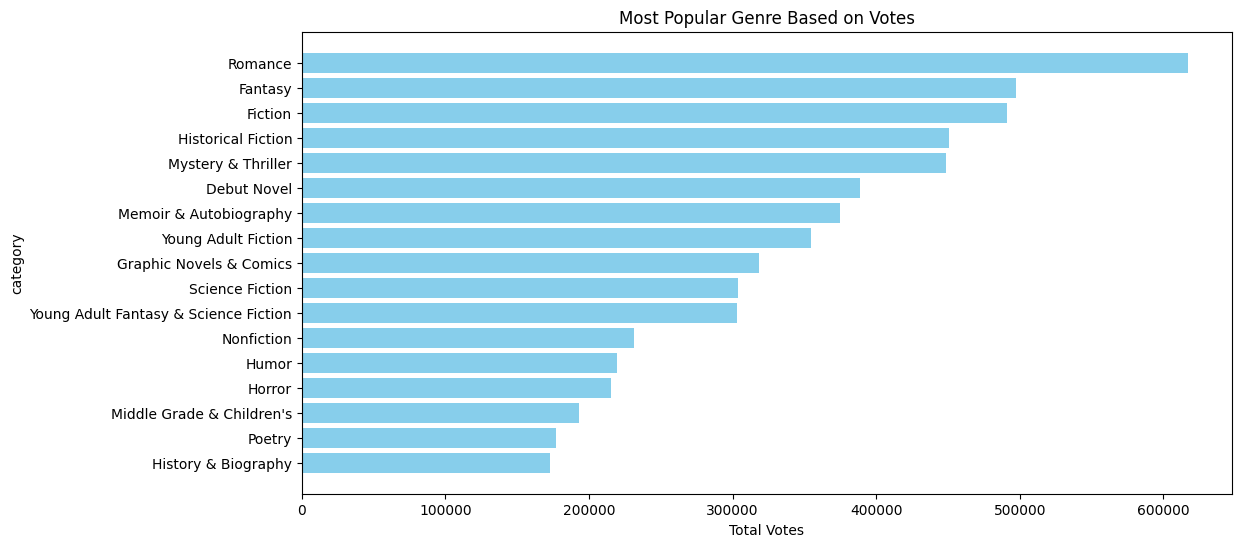

In [91]:
# Group the DataFrame by genre and calculate the sum of votes for each genre
genre_votes = df_book_details.groupby('category')['votes'].sum().reset_index()

# Sort genres by total votes in descending order
genre_votes = genre_votes.sort_values(by='votes', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(genre_votes['category'], genre_votes['votes'], color='skyblue')
plt.xlabel('Total Votes')
plt.ylabel('category')
plt.title('Most Popular Genre Based on Votes')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

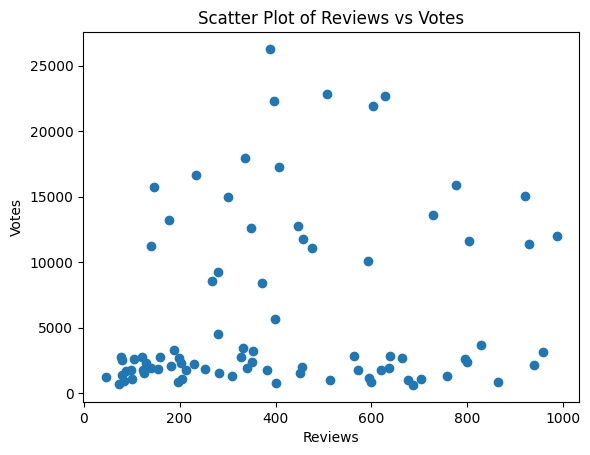

Correlation Coefficient: 0.18
P-value: 0.0956


In [98]:
# Are votes correlated with reviews? 
from scipy.stats import pearsonr

# Assuming df_book_details is your DataFrame containing 'reviews' and 'votes' columns
# Convert 'reviews' and 'votes' columns to numeric, handling non-numeric values
df_book_details['reviews'] = pd.to_numeric(df_book_details['reviews'], errors='coerce')
df_book_details['votes'] = pd.to_numeric(df_book_details['votes'], errors='coerce')

# Drop rows with NaN values in either 'reviews' or 'votes'
df_book_details = df_book_details.dropna(subset=['reviews', 'votes'])

# Create a scatter plot
plt.scatter(df_book_details['reviews'], df_book_details['votes'])
plt.title('Scatter Plot of Reviews vs Votes')
plt.xlabel('Reviews')
plt.ylabel('Votes')
plt.show()

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_book_details['reviews'], df_book_details['votes'])

# Display correlation statistics
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')



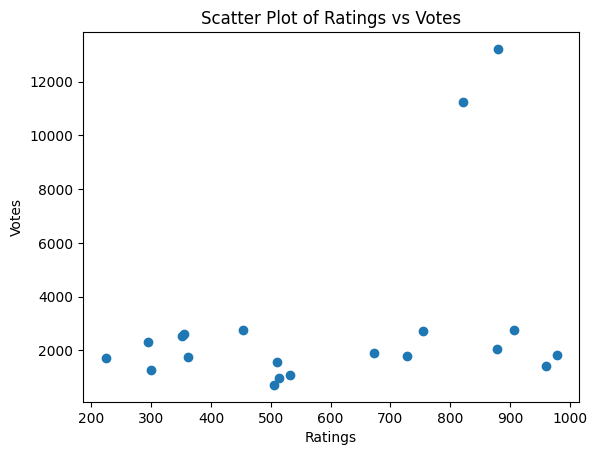

Correlation Coefficient: 0.36
P-value: 0.1240


In [100]:
# Are votes correlated with ratings? 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming df_book_details is your DataFrame containing 'reviews' and 'votes' columns
# Convert 'reviews' and 'votes' columns to numeric, handling non-numeric values
df_book_details['ratings'] = pd.to_numeric(df_book_details['ratings'], errors='coerce')
df_book_details['votes'] = pd.to_numeric(df_book_details['votes'], errors='coerce')

# Drop rows with NaN values in either 'reviews' or 'votes'
df_book_details = df_book_details.dropna(subset=['ratings', 'votes'])

# Create a scatter plot
plt.scatter(df_book_details['ratings'], df_book_details['votes'])
plt.title('Scatter Plot of Ratings vs Votes')
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.show()

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_book_details['ratings'], df_book_details['votes'])

# Display correlation statistics
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')

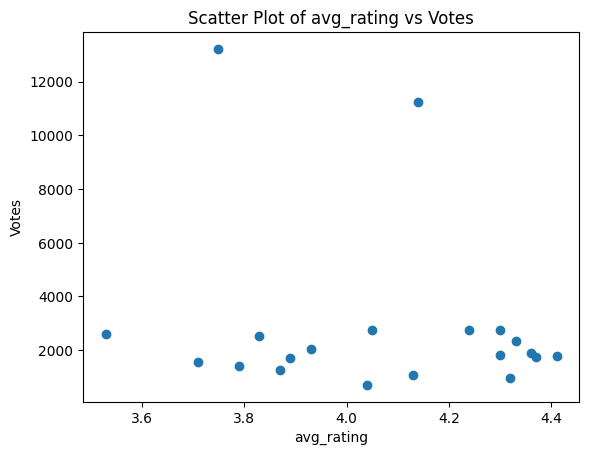

Correlation Coefficient: -0.18
P-value: 0.4526


In [101]:
# Are votes correlated with avg_rating? 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming df_book_details is your DataFrame containing 'reviews' and 'votes' columns
# Convert 'reviews' and 'votes' columns to numeric, handling non-numeric values
df_book_details['avg_rating'] = pd.to_numeric(df_book_details['avg_rating'], errors='coerce')
df_book_details['votes'] = pd.to_numeric(df_book_details['votes'], errors='coerce')

# Drop rows with NaN values in either 'reviews' or 'votes'
df_book_details = df_book_details.dropna(subset=['avg_rating', 'votes'])

# Create a scatter plot
plt.scatter(df_book_details['avg_rating'], df_book_details['votes'])
plt.title('Scatter Plot of avg_rating vs Votes')
plt.xlabel('avg_rating')
plt.ylabel('Votes')
plt.show()

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_book_details['avg_rating'], df_book_details['votes'])

# Display correlation statistics
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')

In [103]:
# Which books rank in multiple categories? 
# Assuming df_books is your DataFrame containing book details, and 'book_title' is the column with book titles
# Check for duplicate book titles
duplicate_titles = df_book_details[df_book_details.duplicated(subset='title', keep=False)]

# Display books with titles in multiple categories
if not duplicate_titles.empty:
    print("Books with titles in multiple categories:")
    print(duplicate_titles[['title', 'category']])
else:
    print("No books with titles in multiple categories.")


No books with titles in multiple categories.


In [104]:
# Export the dataset for Tableau Public
df_book_details.to_csv('goodreads_best_fiction_books_2022.csv', index=False)